In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\ankom\\Downloads\\Bank_customers_data.csv")
df

,Unnamed: 0,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,loan,score,loan_eligibility
0,0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15,5252.0,644.0,2276203.00
1,1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73,8907.0,697.0,0.00
2,2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83,2162.0,617.0,2030736.60
3,3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52,7277.0,672.0,0.00
4,4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79,2586.0,405.0,178198.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4009,4009,200004010,Sam,Lewis,Male,64,Scotland,Other,30.Dec.15,19711.66,9957.0,586.0,0.00
4010,4010,200004011,Keith,Hughes,Male,52,Scotland,Blue Collar,30.Dec.15,56069.72,6701.0,319.0,0.00
4011,4011,200004012,Hannah,Springer,Female,50,Scotland,Other,30.Dec.15,59477.82,7650.0,682.0,0.00
4012,4012,200004013,Christian,Reid,Male,51,Scotland,Blue Collar,30.Dec.15,239.45,4682.0,369.0,0.00


In [3]:
df.isna().sum()

Unnamed: 0            0
Customer ID           0
Name                  0
Surname               0
Gender                0
Age                   0
Region                0
Job Classification    0
Date Joined           0
Balance               0
loan                  0
score                 0
loan_eligibility      0
dtype: int64

In [4]:
df=df.drop(["Unnamed: 0"],axis=1)
df

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,loan,score,loan_eligibility
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15,5252.0,644.0,2276203.00
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73,8907.0,697.0,0.00
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83,2162.0,617.0,2030736.60
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52,7277.0,672.0,0.00
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79,2586.0,405.0,178198.95
...,...,...,...,...,...,...,...,...,...,...,...,...
4009,200004010,Sam,Lewis,Male,64,Scotland,Other,30.Dec.15,19711.66,9957.0,586.0,0.00
4010,200004011,Keith,Hughes,Male,52,Scotland,Blue Collar,30.Dec.15,56069.72,6701.0,319.0,0.00
4011,200004012,Hannah,Springer,Female,50,Scotland,Other,30.Dec.15,59477.82,7650.0,682.0,0.00
4012,200004013,Christian,Reid,Male,51,Scotland,Blue Collar,30.Dec.15,239.45,4682.0,369.0,0.00


In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(4014, 12)

In [7]:
df_num=df.select_dtypes(include=['number'])

In [8]:
for k,v in df_num.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    v_col = v[(v >= lower_bound) & (v <= upper_bound)]
    
    # Dropping outliers from the original DataFrame
    df = df[df[k].isin(v_col)]

In [9]:
df_char=df.select_dtypes(include=['object'])
df_char

,Name,Surname,Gender,Region,Job Classification,Date Joined
3,Trevor,Parr,Male,Wales,White Collar,08.Jan.15
4,Deirdre,Pullman,Female,England,Blue Collar,09.Jan.15
6,Dorothy,Thomson,Female,England,Blue Collar,11.Jan.15
7,Lisa,Knox,Female,Scotland,Other,11.Jan.15
8,Ruth,Campbell,Female,Wales,White Collar,11.Jan.15
...,...,...,...,...,...,...
4009,Sam,Lewis,Male,Scotland,Other,30.Dec.15
4010,Keith,Hughes,Male,Scotland,Blue Collar,30.Dec.15
4011,Hannah,Springer,Female,Scotland,Other,30.Dec.15
4012,Christian,Reid,Male,Scotland,Blue Collar,30.Dec.15


C:\Users\ankom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

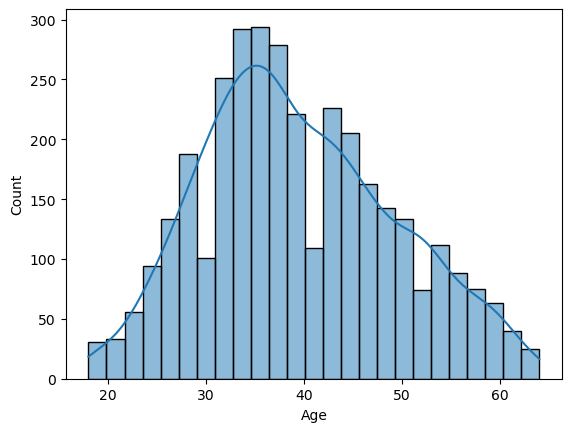

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['Age'],kde=True)

<Axes: xlabel='Gender', ylabel='count'>

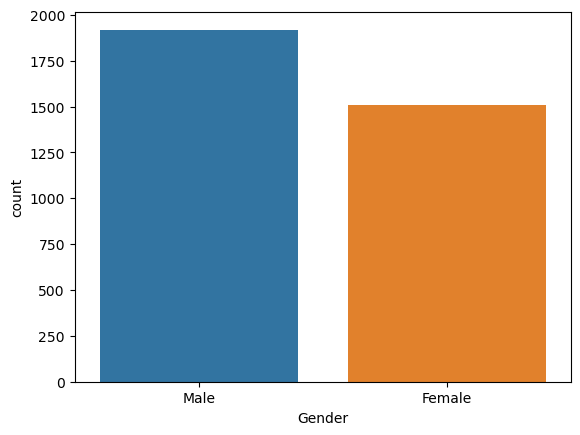

In [24]:
sns.countplot(data=df,x="Gender")

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df_num=df.select_dtypes(include=['number']).columns
df[df_num]=scaler.fit_transform(df[df_num])


In [26]:
from sklearn.preprocessing import LabelEncoder
scaler=LabelEncoder()
df_char=df.select_dtypes(include=['object']).columns
#df[df_char]=scaler.fit_transform(df[df_char])
for col in df_char:
    df[col]=scaler.fit_transform(df[col])

In [27]:
df.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,loan,score,loan_eligibility
3,9.999800e-01,160,101,1,0.304348,2,2,67,0.011838,0.697755,0.9300,0.000000
4,0.000000e+00,41,110,0,0.434783,0,0,77,0.299129,0.176301,0.2625,0.256582
6,9.999800e-09,46,134,0,0.347826,0,0,98,0.359915,0.182748,0.4175,0.308705
7,4.999900e-01,104,68,0,0.652174,1,1,98,0.307863,0.758559,0.0350,0.000000
8,9.999800e-01,137,21,0,0.326087,2,2,98,0.623581,0.174077,0.4950,0.000000


In [28]:
df.shape

(3429, 12)

In [29]:
df.isnull().sum()

Customer ID           0
Name                  0
Surname               0
Gender                0
Age                   0
Region                0
Job Classification    0
Date Joined           0
Balance               0
loan                  0
score                 0
loan_eligibility      0
dtype: int64

In [31]:
X=df.drop(["loan_eligibility"],axis=1)
X

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,loan,score
3,9.999800e-01,160,101,1,0.304348,2,2,67,0.011838,0.697755,0.9300
4,0.000000e+00,41,110,0,0.434783,0,0,77,0.299129,0.176301,0.2625
6,9.999800e-09,46,134,0,0.347826,0,0,98,0.359915,0.182748,0.4175
7,4.999900e-01,104,68,0,0.652174,1,1,98,0.307863,0.758559,0.0350
8,9.999800e-01,137,21,0,0.326087,2,2,98,0.623581,0.174077,0.4950
...,...,...,...,...,...,...,...,...,...,...,...
4009,5.000100e-01,140,73,1,1.000000,1,1,288,0.165399,0.995665,0.7150
4010,5.000100e-01,94,58,1,0.739130,1,0,288,0.470655,0.633726,0.0475
4011,5.000100e-01,63,129,0,0.695652,1,1,288,0.499268,0.739217,0.9550
4012,5.000100e-01,34,115,1,0.717391,1,0,288,0.001914,0.409293,0.1725


In [32]:
Y=df["loan_eligibility"]
Y

3       0.000000
4       0.256582
6       0.308705
7       0.000000
8       0.000000
          ...   
4009    0.000000
4010    0.000000
4011    0.000000
4012    0.000000
4013    0.000000
Name: loan_eligibility, Length: 3429, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
X_test,X_train,Y_test,Y_train=train_test_split(X,Y,test_size=0.3,random_state=42)

In [34]:
X_train

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,loan,score
687,0.999983,168,107,0,0.326087,2,2,251,0.299099,0.518564,0.5300
1264,0.000006,102,123,0,0.478261,0,0,180,0.263860,0.103157,0.2425
672,0.499993,27,34,1,0.760870,1,1,242,0.600025,0.673522,0.7650
2747,0.000014,40,68,1,0.239130,0,2,223,0.181062,0.189418,0.6450
3812,0.000019,127,133,0,0.652174,0,2,178,0.379115,0.036683,0.2225
...,...,...,...,...,...,...,...,...,...,...,...
2478,0.000012,12,99,1,0.413043,0,2,53,0.231013,0.625834,0.3100
3809,0.000019,6,29,0,0.108696,0,2,178,0.395465,0.047132,0.2375
1606,0.000008,12,64,1,0.326087,0,0,117,0.426576,0.844042,0.1900
2489,0.999992,112,101,1,0.282609,2,0,53,0.336422,0.911516,0.0225


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [36]:
y_pred = lin_reg.predict(X_test)
y_pred

array([ 0.38079626,  0.00269025, -0.14396571, ...,  0.20688366,
        0.35722998,  0.27826123])

In [37]:
Y_test

3926    0.905293
3567    0.000000
1455    0.000000
3410    0.000000
1192    0.405888
          ...   
1310    0.460698
1352    0.000000
1551    0.167363
1036    0.443497
3728    0.161616
Name: loan_eligibility, Length: 2400, dtype: float64

In [38]:
mean_squared_error(y_pred,Y_test)

0.02650778424293581

In [39]:
lin_reg.score(X_train,Y_train)

0.5869435757343119

In [40]:
lin_reg.score(X_test,Y_test)

0.5846385828057532

In [41]:
scores = cross_val_score(lin_reg, X_train, Y_train, cv = 15, scoring='r2')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.62277829 0.43699549 0.52446702 0.65222901 0.5966118  0.63568319
 0.46697109 0.66811704 0.55414125 0.59084598 0.60995716 0.47439323
 0.54460161 0.51166519 0.60199266]
Average cross-validation score: 0.5661


In [42]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion="friedman_mse")
dt1=dtr.fit(X_train,Y_train)
dt1.score(X_train,Y_train)

1.0

In [43]:
from sklearn.metrics import accuracy_score,r2_score

In [44]:
dt_y_pred=dt1.predict(X_test)
dt_y_pred
r2_score(Y_test,dt_y_pred)

0.9871815524426623

In [45]:
from sklearn.ensemble import RandomForestRegressor
randomforest=RandomForestRegressor(n_estimators=500,max_depth=10)
rf1=randomforest.fit(X_train,Y_train)
rf1.score(X_train,Y_train)

0.9992209589606658

In [46]:
rf_y_pred=rf1.predict(X_test)
r2_score(Y_test,rf_y_pred)

0.9935566791831246

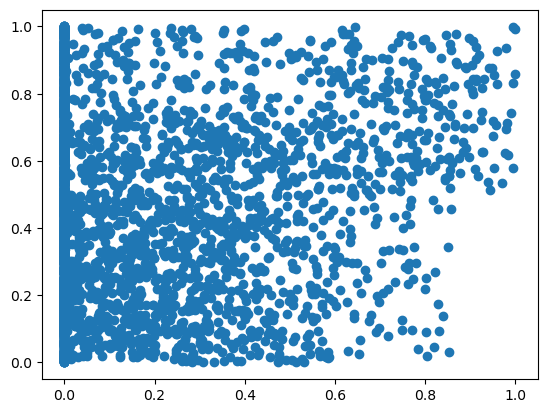

In [47]:
plt.scatter(df['loan_eligibility'],df['score'])

In [53]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [52]:
km.fit_predict(X_train,Y_train)

C:\Users\ankom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ankom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


array([2, 2, 7, ..., 8, 9, 2])

In [50]:
km.fit_predict(X_test,Y_test)

C:\Users\ankom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 0, 2, ..., 0, 3, 1])